### **Import data**

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000,'display.max_rows',None, 'display.max_columns',None)

# Plot options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style = 'whitegrid')


In [2]:
import os
os.listdir(os.getcwd())

['LendingLoanEDA.ipynb',
 'README.md',
 '.ipynb_checkpoints',
 '.git',
 'accepted_2007_to_2018Q4.csv.gz']

In [3]:
loans = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression ='gzip',low_memory=True)

/var/folders/8f/c3wp81s97mx_4cyjt0ks4rc80000gn/T/ipykernel_52245/393940706.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression ='gzip',low_memory=True)


Check basic dataframe info:

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


There are 2.3 million rows and 151 variables. The size of the dataset is 2.5+GB

In [5]:
loans.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1886245,2308404,NaN,19075.0,19075.0,19075.0,60 months,17.77,482.00,D,D1,Washington County Schools,9 years,MORTGAGE,62000.0,Verified,Dec-2012,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=2308404,Borrower added on 12/19/12 > credit cards/consolidate loans<br>,credit_card,Credit card refinancing,279xx,NC,9.93,0.0,Nov-2000,690.0,694.0,0.0,71.0,NaN,22.0,0.0,16059.0,71.4,36.0,f,0.00,0.00,11250.210000,11250.21,4335.72,4809.80,0.0,2104.69,20.9221,Aug-2014,482.00,NaN,Oct-2016,654.0,650.0,0.0,75.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,169550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22500.0,NaN,NaN,NaN,6.0,8478.0,269.0,98.1,0.0,0.0,94.0,147.0,31.0,5.0,0.0,94.0,NaN,NaN,71.0,0.0,2.0,4.0,2.0,6.0,24.0,7.0,12.0,4.0,22.0,0.0,0.0,0.0,3.0,97.0,100.0,0.0,0.0,183891.0,169550.0,14400.0,161391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1891953,2216846,NaN,8500.0,8500.0,8500.0,36 months,13.11,286.85,B,B4,Department of Justice,10+ years,MORTGAGE,105000.0,Not Verified,Nov-2012,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=2216846,NaN,debt_consolidation,Debt Consolidation,282xx,NC,22.80,2.0,Jan-1988,685.0,689.0,0.0,13.0,NaN,13.0,0.0,31585.0,84.0,32.0,f,0.00,0.00,9926.915865,9926.92,8500.00,1426.92,0.0,0.00,0.0000,Aug-2014,4478.40,NaN,Mar-2019,649.0,645.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,46594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37600.0,NaN,NaN,NaN,1.0,3584.0,1190.0,93.6,0.0,0.0,303.0,273.0,20.0,20.0,0.0,20.0,

**Response variable: loan status**

In [6]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

For the simplicity of this project, we only consider the loan that is fully paid or charged off.

In [7]:
loans = loans.loc[loans['loan_status'].isin(['Fully Paid','Charged Off'])]

In [8]:
loans.shape # There are 1.3 million loans remaining

(1345310, 151)

In [9]:
loans['loan_status'].value_counts()

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

In [10]:
# status counts as percentage
loans['loan_status'].value_counts(normalize=True)

Fully Paid     0.800374
Charged Off    0.199626
Name: loan_status, dtype: float64

About 80% of the remaining loans have been fully paid and 20% have charged off, so we have a somewhat unbalanced classification problem.

### **Feature selection**

The full dataset has 151 features for each loan. We will select features in two steps:
1. Drop features with more than 30% of their data missing
2. Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan.

1. Drop the features missing more than 30% data

In [11]:
# Calculate the percentage of missing data for each feature
missing_fraction = loans.isnull().mean().sort_values(ascending=False)
# Top 10 features missing the most data:
missing_fraction.head(10)

next_pymnt_d                                  1.000000
member_id                                     1.000000
orig_projected_additional_accrued_interest    0.997206
hardship_start_date                           0.995723
hardship_length                               0.995723
hardship_type                                 0.995723
hardship_reason                               0.995723
hardship_status                               0.995723
deferral_term                                 0.995723
hardship_amount                               0.995723
dtype: float64

In [12]:
# store all variables missing more than 30% data:
drop_list = sorted(list(missing_fraction[missing_fraction > 0.3].index))
len(drop_list) # 58 features will be dropped
loans.drop(labels=drop_list, axis = 1, inplace = True)
loans.shape # (1345310, 93)


(1345310, 93)

2. Only keep loan features known to potential investors

In [13]:
print(sorted(loans.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sa

After checking the description in the data dictionary, I am using my best available knowledge to determine which loan features are known to potential investors and only keep those features in our data set.

In [20]:
keep_list = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
'home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose','title','dti','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type',
'mort_acc','pub_rec_bankruptcies']

# only keep those features in the data set
loans = loans[keep_list]

loans.shape # (1345310, 26)

(1345310, 26)

### **EDA**

In [23]:
loans.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344936e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344453e+06,1.345310e+06,1.298029e+06,1.344613e+06
mean,1.441997e+04,1.323962e+01,4.380755e+02,7.624764e+04,1.828267e+01,1.159352e+01,2.152760e-01,1.624811e+04,5.181002e+01,2.498084e+01,1.670783e+00,1.344439e-01
std,8.717051e+03,4.768716e+00,2.615126e+02,6.992510e+04,1.116045e+01,5.473789e+00,6.018647e-01,2.232817e+04,2.452107e+01,1.199847e+01,2.000444e+00,3.779285e-01
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.750000e+00,2.484800e+02,4.578000e+04,1.179000e+01,8.000000e+00,0.000000e+00,5.943000e+03,3.340000e+01,1.600000e+01,0.000000e+00,0.000000e+00
50%,1.200000e+04,1.274000e+01,3.754300e+02,6.500000e+04,1.761000e+01,1.100000e+01,0.000000e+00,1.113400e+04,5.220000e+01,2.300000e+01,1.000000e+00,0.000000e+00
75%,2.000000e+04,1.599000e+01,5.807300e+02,9.000000e+04,2.406000e+01,1.400000e+01,0.000000e+00,1.975575e+04,7.070000e+01,3.200000e+01,3.000000e+00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02,9.000000e+01,8.600000e+01,2.904836e+06,8.923000e+02,1.760000e+02,5.100000e+01,1.200000e+01


In [24]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  object 
 2   int_rate              1345310 non-null  float64
 3   installment           1345310 non-null  float64
 4   grade                 1345310 non-null  object 
 5   sub_grade             1345310 non-null  object 
 6   emp_title             1259525 non-null  object 
 7   emp_length            1266799 non-null  object 
 8   home_ownership        1345310 non-null  object 
 9   annual_inc            1345310 non-null  float64
 10  verification_status   1345310 non-null  object 
 11  issue_d               1345310 non-null  object 
 12  loan_status           1345310 non-null  object 
 13  purpose               1345310 non-null  object 
 14  title                 1328651 non-

**Loan status**

Current status of the loan

(array([0, 1]), [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')])

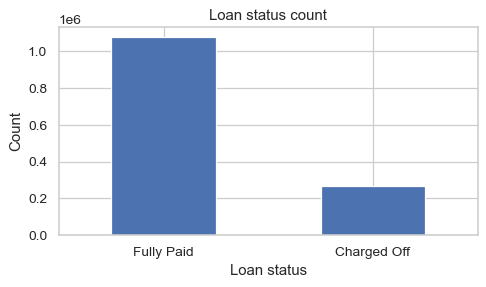

In [37]:
plt.figure(figsize=(6,3), dpi=90)
loans.value_counts('loan_status').plot.bar(x='loan_status')
plt.title('Loan status count')
plt.xlabel('Loan status')
plt.ylabel('Count')
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'Loan Amount by loan status')

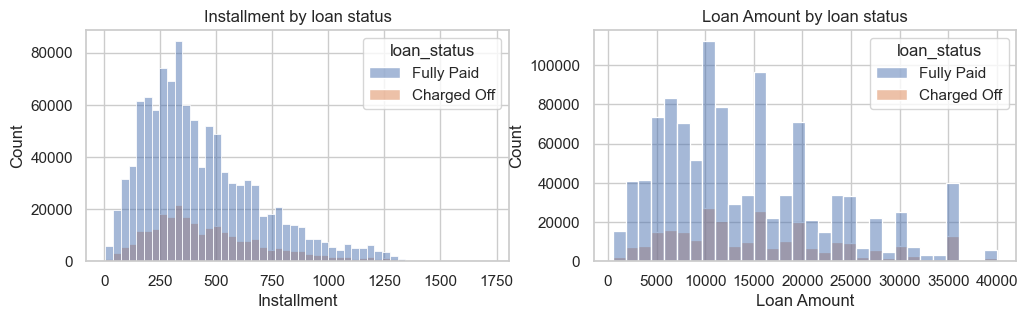

In [47]:
f, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,3))
sns.histplot(data = loans, x = loans['installment'], hue = 'loan_status', bins = 50, ax= ax1)
ax1.set_xlabel('Installment')
ax1.set_ylabel('Count')
ax1.set_title('Installment by loan status')

sns.histplot(data = loans, x = loans['loan_amnt'], hue = 'loan_status', bins = 30, ax= ax2)
ax2.set_xlabel('Loan Amount')
ax2.set_ylabel('Count')
ax2.set_title('Loan Amount by loan status')



Text(0.5, 1.0, 'Loan status by loan amount')

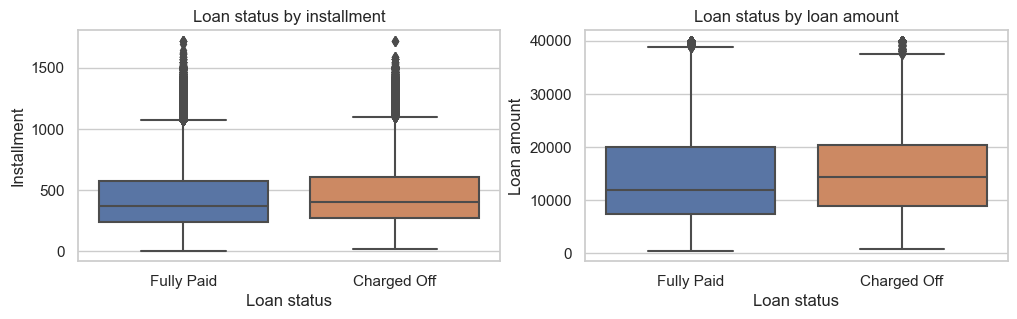

In [48]:
f, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,3))
sns.boxplot(data = loans, y = 'installment', x = 'loan_status', ax= ax1)
ax1.set_ylabel('Installment')
ax1.set_xlabel('Loan status')
ax1.set_title('Loan status by installment')

sns.boxplot(data = loans, y = 'loan_amnt', x = 'loan_status', ax= ax2)
ax2.set_xlabel('Loan status')
ax2.set_ylabel('Loan amount')
ax2.set_title('Loan status by loan amount')

In [76]:
def plot_var(col_name, full_name, continuous):
    f,(ax1,ax2) = plt.subplots(nrows = 1,  ncols =2, figsize = (12,3))

    # Plot without loan status: plot the count of the variable
    if continuous:
        sns.histplot(data = loans, x = col_name, bins = 50, ax=ax1)

    else:
        sns.countplot(data = loans, x = col_name, order = sorted(loans[col_name].unique()), ax = ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(data = loans, x = col_name, y = 'loan_status', ax = ax2)
        ax2.set_title(full_name + ' by Loan Status')
    else:
        default_rate = loans.groupby(col_name)['loan_status'].value_counts(normalize = True).loc[:,'Charged Off']
        sns.barplot(x=default_rate.index, y = default_rate.values, ax = ax2)
        ax2.set_title('Default Rate by' + full_name)

    plt.tight_layout()

**loan_amnt**

In [74]:
loans['loan_amnt'].describe() 
# Loan range from $500 to $40000 with a median of $12,000

count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

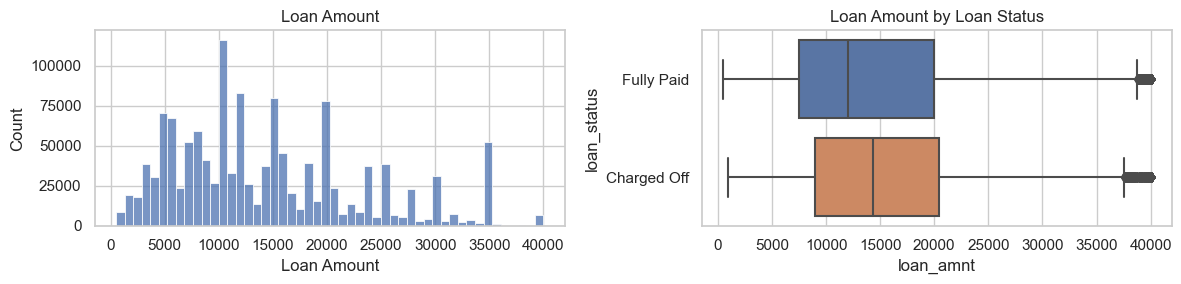

In [77]:
plot_var('loan_amnt','Loan Amount', continuous = True)

**Term**

Data dictionary: the number of payments on the loan. Values are in months and can be either 36 or 60.

In [81]:
loans['term'].value_counts(normalize=True)

 36 months    0.758742
 60 months    0.241258
Name: term, dtype: float64

In [82]:
loans.groupby('term')['loan_status'].value_counts(normalize = True).loc[:,'Charged Off']

term
 36 months    0.159934
 60 months    0.324454
Name: loan_status, dtype: float64

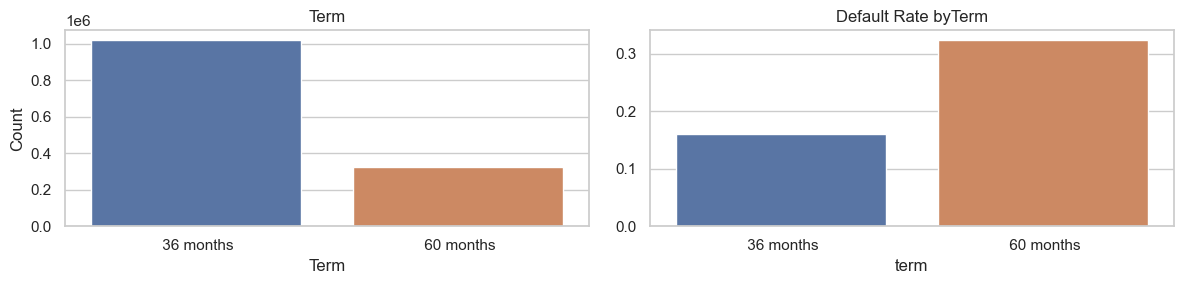

In [80]:
plot_var('term','Term', continuous = False)

About 76% of the completed loans have three year periods, and the rest have five year periods. Loans with five year periods (32%) are more than twice as likely to charge off as loans with three year periods (16%).

**int_rate**

Data Dictionary: interest rate on the loan

In [84]:
loans['int_rate'].describe()
# Interest rates range from 5.31% to 30.99% with a median of 13.1%

count    1.345310e+06
mean     1.323962e+01
std      4.768716e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

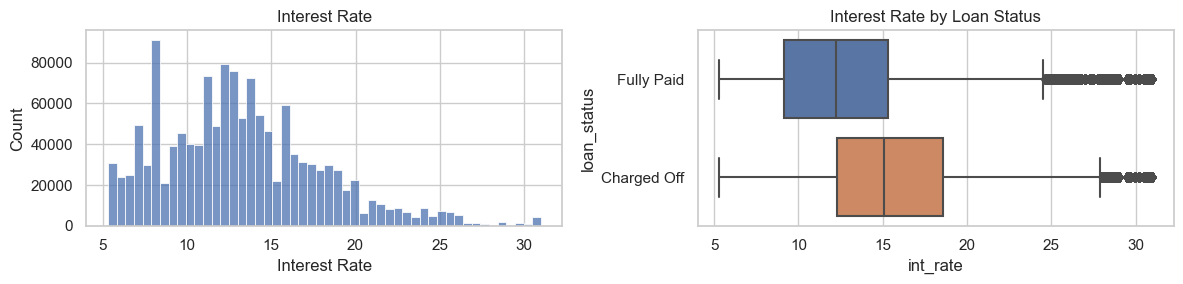

In [87]:
plot_var('int_rate', 'Interest Rate', continuous = True)

In [88]:
loans.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15.710714,4.910387,5.31,12.29,15.05,18.55,30.99
Fully Paid,1076751.0,12.623288,4.527227,5.31,9.17,12.23,15.31,30.99


Charged off loans tend to have a higher interest rate than fully paid loans.

**Installment**

Data Dictionary: the monthly payment owned by borrower of the loan originates.


In [91]:
loans['installment'].describe()
# Installments range form $4.93 to $1,719 with a median of $377

count    1.345310e+06
mean     4.380755e+02
std      2.615126e+02
min      4.930000e+00
25%      2.484800e+02
50%      3.754300e+02
75%      5.807300e+02
max      1.719830e+03
Name: installment, dtype: float64

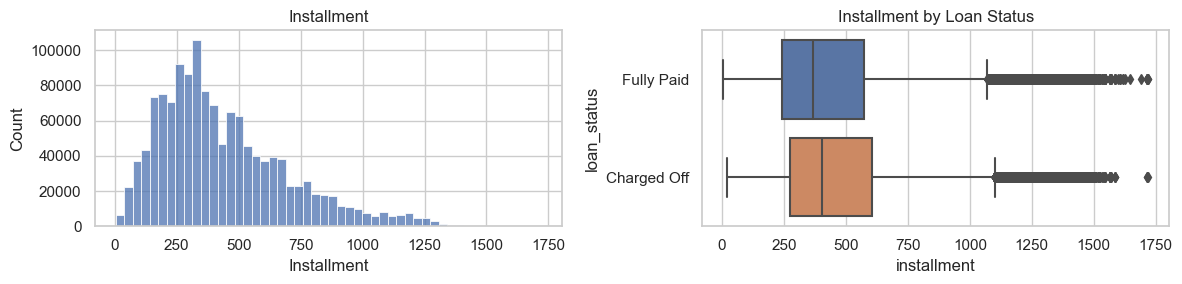

In [92]:
plot_var('installment', 'Installment', continuous = True)

In [93]:
loans.groupby('loan_status')['installment'].describe()
# Loans that charge off have $30 higher installments on average

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,465.147994,262.774106,21.62,275.29,402.83,605.31,1717.63
Fully Paid,1076751.0,431.323226,260.759563,4.93,240.92,368.26,573.06,1719.83


**grade, sub_grade**

Data dictionary for grade: LendingClub assigned loan grade

Data dictionary for sub_grade: LendingClub assigned loan subgrade.

In [95]:
print(sorted(loans['grade'].unique()))
print(sorted(loans['sub_grade'].unique()))
# because the grade is implied by the sub_grade, will drop the grade column

['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


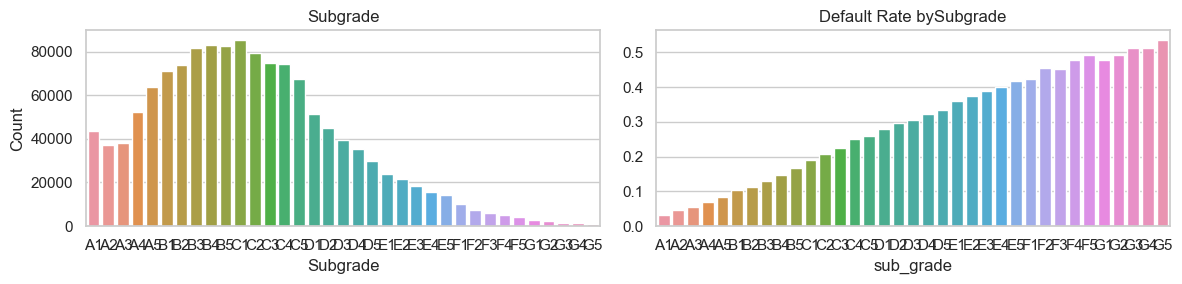

In [96]:
plot_var('sub_grade','Subgrade', continuous = False)

As subgrade worsens, the charge off rate increases

**emp_title**

Data dictionary: the job title supplied by the borrower when applying for the loan

In [97]:
loans['emp_title'].describe()
# There are too many different job titles for this feature to be userful, so we will drop it.

count     1259525
unique     378353
top       Teacher
freq        21268
Name: emp_title, dtype: object

**emp_length**

Data Dictionary: employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. The actual data does not match this description

In [99]:
loans['emp_length'].value_counts(dropna = False).sort_index()

1 year        88494
10+ years    442199
2 years      121743
3 years      107597
4 years       80556
5 years       84154
6 years       62733
7 years       59624
8 years       60701
9 years       50937
< 1 year     108061
NaN           78511
Name: emp_length, dtype: int64

There are 78,511 loans without data on the length of employment. We will replace Na and <1 year to 1 year and 10+ years to 10 years when we do data processing

In [106]:
# Convert emp_length to integers:
loans['emp_length'].replace('10+ years','10 years', inplace =True)
loans['emp_length'].replace('< 1 year','0 years', inplace =True)

In [115]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return float(s.split()[0])

In [116]:
loans['emp_length'] = loans['emp_length'].apply(emp_length_to_int)

In [117]:
loans['emp_length'].value_counts(dropna=False).sort_index()

0.0     108061
1.0      88494
2.0     121743
3.0     107597
4.0      80556
5.0      84154
6.0      62733
7.0      59624
8.0      60701
9.0      50937
10.0    442199
NaN      78511
Name: emp_length, dtype: int64

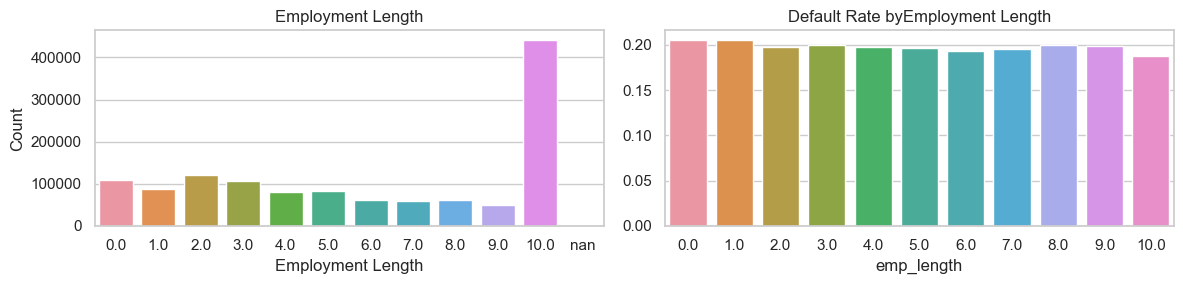

In [118]:
plot_var('emp_length','Employment Length', continuous = False)

Loan status does not appear to vary much with employment length on average, except for a small drop in charge offs for borrowers with over 10 years of employment

**home_ownership**

Data Dictionary: the home ownership status provided by the borrower during registration or obtained from the client report. Values are Rent, OWN, MORTGAGE, OTHER

In [119]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

In [120]:
# replace the value ANY and NONE with OTHER:
loans['home_ownership'].replace(['NONE','ANY'],'OTHER', inplace = True)

In [121]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    665579
RENT        534421
OWN         144832
OTHER          478
Name: home_ownership, dtype: int64

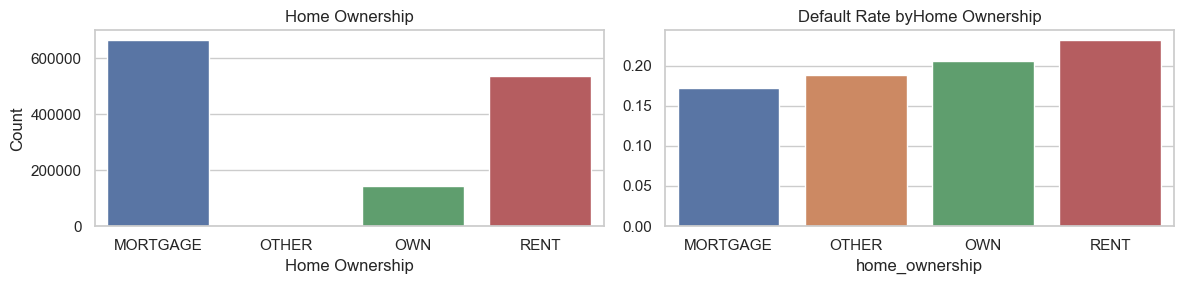

In [122]:
plot_var('home_ownership','Home Ownership', continuous = False)

In [124]:
loans.groupby('home_ownership')['loan_status'].value_counts(normalize = True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.172077
OTHER       0.188285
OWN         0.206198
RENT        0.232165
Name: loan_status, dtype: float64

There appear to be large differences in charge-off rates by home ownership status. Renters and homeowners have a higher probability of charge off.

**annual_inc**

Data Dictionary: the self-reported annual income provided by the borrower during registration

In [127]:
loans['annual_inc'].describe()
# Annual income ranges from $0 to $9,550,000 with a median of $65,000. 
# Because of the large range of incomes, we should take a log transform of the annual income variable

count    1.345310e+06
mean     7.624764e+04
std      6.992510e+04
min      0.000000e+00
25%      4.578000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

In [128]:
loans['log_annual_inc'] = loans['annual_inc'].apply(lambda x: np.log10(x+1))
loans.drop('annual_inc', axis = 1, inplace = True)
loans['log_annual_inc'].describe()

count    1.345310e+06
mean     4.812814e+00
std      2.477200e-01
min      0.000000e+00
25%      4.660685e+00
50%      4.812920e+00
75%      4.954247e+00
max      7.041361e+00
Name: log_annual_inc, dtype: float64

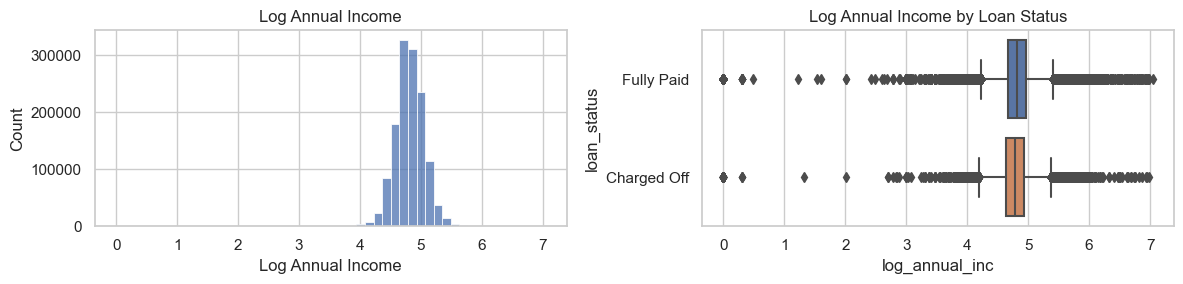

In [129]:
plot_var('log_annual_inc', 'Log Annual Income', continuous = True)

**verification_status**

Data dictionary: indicates if income was verified by Lending Club, not vertified, or if the income source was verified.

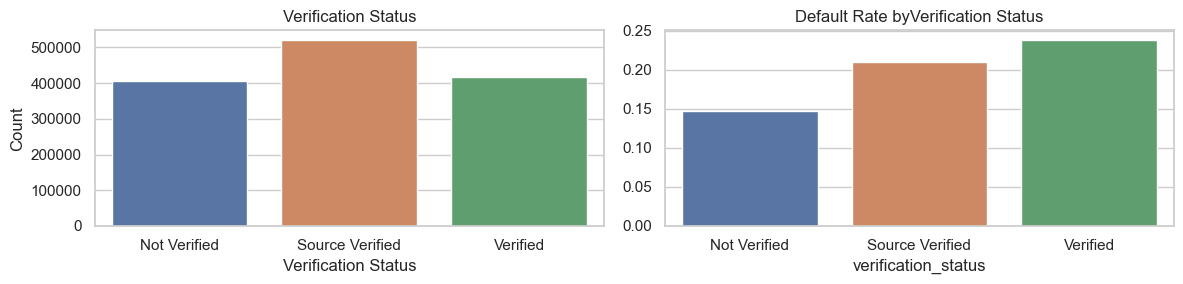

In [131]:
plot_var('verification_status','Verification Status', continuous= False)

**purpose**

Data Dictionary: A category provided by the borrower for the loan request

In [140]:
loans['purpose'].value_counts()

debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
house                   7253
wedding                 2294
renewable_energy         933
educational              326
Name: purpose, dtype: int64

In [142]:
# Calculate the charge off rates by purpose:
loans.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.121622
car                   0.146795
credit_card           0.169270
educational           0.171779
home_improvement      0.177158
major_purchase        0.185998
vacation              0.191726
other                 0.210401
debt_consolidation    0.211469
medical               0.217757
house                 0.218806
moving                0.233544
renewable_energy      0.236870
small_business        0.297094
Name: loan_status, dtype: float64

Only 12% of completed loans for weddings have charged off, but 30% of completed small business loans have charged off.

**title**

Data dictionary: the loan title provided by the borrower.

In [143]:
loans['title'].describe()

count                1328651
unique                 61682
top       Debt consolidation
freq                  660960
Name: title, dtype: object

In [146]:
loans['title'].value_counts().head(10)
# There are 61,682 different titles in the data set
# and based on the top 10 titles, the purpose variable appears to already contain this information. 
# So we drop the title variable.

Debt consolidation         660960
Credit card refinancing    249910
Home improvement            75073
Other                       66778
Major purchase              24045
Debt Consolidation          15695
Medical expenses            13576
Business                    11750
Car financing               11220
Vacation                     8046
Name: title, dtype: int64

**dti**

Data dictionary: a ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income.

In [149]:
loans['dti'].describe()
# min value -1 and max value 999 doesn't make sense
# there are several outliers that mess up our default plot

count    1.344936e+06
mean     1.828267e+01
std      1.116045e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.406000e+01
max      9.990000e+02
Name: dti, dtype: float64

Text(0.5, 1.0, 'Debt-to-income Ratio')

<Figure size 800x300 with 0 Axes>

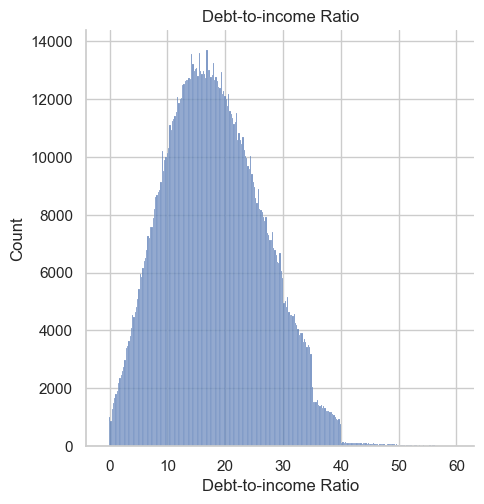

In [153]:
plt.figure(figsize = (8,3))
sns.displot(loans.loc[loans['dti'].notnull() & (loans['dti']<60),'dti'],kde = False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [156]:
(loans['dti']>=60).sum()

1715

In [157]:
loans.groupby('loan_status')['dti'].describe()
# Charged off loans tend to have a higher debt-to-income ratio.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268488.0,20.171196,11.831747,0.0,13.55,19.76,26.31,999.0
Fully Paid,1076448.0,17.811629,10.935927,-1.0,11.43,17.11,23.44,999.0


**earliest_cr_line**

Data Dictionary: the month the borrower's earliest reported credit line was opened.

In [160]:
loans['earliest_cr_line'].sample(5)

1067326    Jul-1997
313244     May-2003
1204394    Oct-1989
1917469    Jun-2002
58508      Jun-1993
Name: earliest_cr_line, dtype: object

In [164]:
# For simplicity, we only contain the year information of earliest_cr_line variable
loans['earliest_cr_line'] = loans['earliest_cr_line'].apply(lambda s: int(s[-4:]))

In [165]:
loans['earliest_cr_line'].describe()

count    1.345310e+06
mean     1.998693e+03
std      7.608258e+00
min      1.934000e+03
25%      1.995000e+03
50%      2.000000e+03
75%      2.004000e+03
max      2.015000e+03
Name: earliest_cr_line, dtype: float64

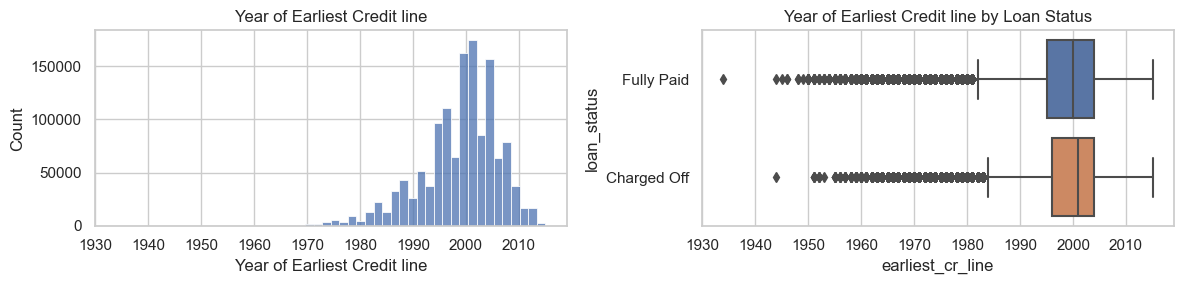

In [166]:
plot_var('earliest_cr_line','Year of Earliest Credit line', continuous = True)

In [167]:
loans.groupby('loan_status')['earliest_cr_line'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,1999.363689,7.579816,1944.0,1996.0,2001.0,2004.0,2015.0
Fully Paid,1076751.0,1998.525174,7.606118,1934.0,1995.0,2000.0,2004.0,2015.0


Charged off borrowers tend to have shorter line of credit

**open_acc**

Data dictionary: the number of open credit lines in the borrower;s credit file


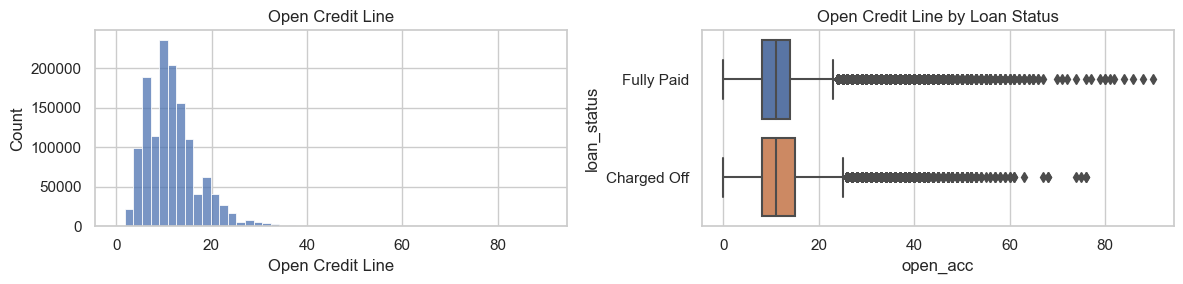

In [172]:
plot_var('open_acc', 'Open Credit Line', continuous = True)

In [173]:
loans.groupby('loan_status')['open_acc'].describe()
# There is not a big difference in number of credit lines between fully paid loans and charged off loans

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,11.901269,5.637964,0.0,8.0,11.0,15.0,76.0
Fully Paid,1076751.0,11.516763,5.429354,0.0,8.0,11.0,14.0,90.0


**pub_re**

Data dictionary: number of derogatory public records


In [174]:
loans['pub_rec'].value_counts().sort_index()

0.0     1117425
1.0      190789
2.0       24435
3.0        7399
4.0        2630
5.0        1266
6.0         636
7.0         283
8.0         160
9.0          83
10.0         57
11.0         40
12.0         27
13.0         18
14.0          5
15.0          9
16.0          5
17.0          3
18.0          6
19.0          5
20.0          3
21.0          6
22.0          2
23.0          1
24.0          2
25.0          1
28.0          3
34.0          1
37.0          1
40.0          1
46.0          1
47.0          1
49.0          2
54.0          1
61.0          1
63.0          1
86.0          1
Name: pub_rec, dtype: int64

In [178]:
loans.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,0.246843,0.656732,0.0,0.0,0.0,0.0,86.0
Fully Paid,1076751.0,0.207403,0.587118,0.0,0.0,0.0,0.0,63.0


Charged off loans tend to have a higher public records

**revol_bal**

Data dictionary: total credit revolving balance

In [181]:
loans['revol_bal'].describe()

count    1.345310e+06
mean     1.624811e+04
std      2.232817e+04
min      0.000000e+00
25%      5.943000e+03
50%      1.113400e+04
75%      1.975575e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

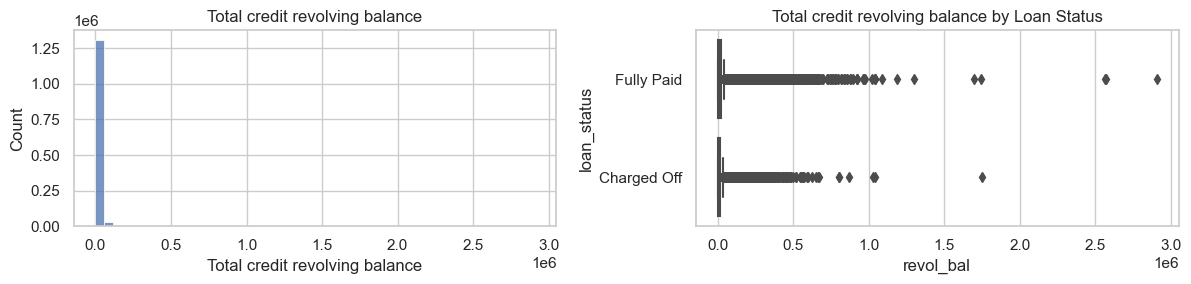

In [183]:
plot_var('revol_bal', 'Total credit revolving balance', continuous = True)

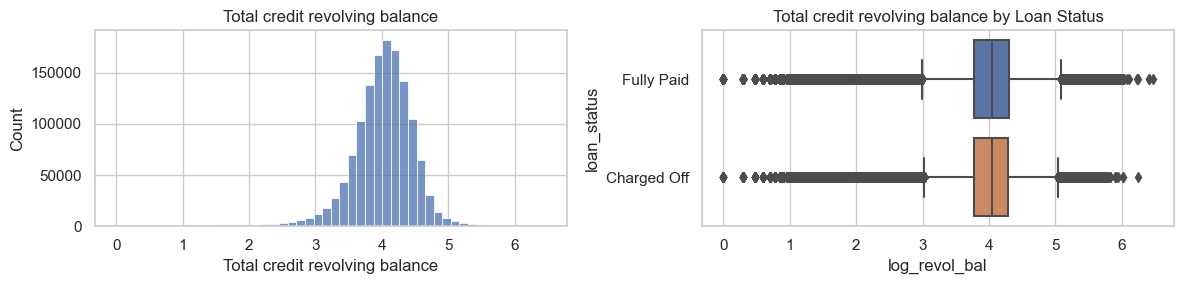

In [185]:
# The min-max difference is huge, let's do a log transformation

loans['log_revol_bal'] = loans['revol_bal'].apply(lambda x: np.log10(x))
plot_var('log_revol_bal', 'Total credit revolving balance', continuous = True)

**application_type**

Data dictionary: indicates whether the loan is an individual application or a joint application with two co-borrowers


In [187]:
loans['application_type'].value_counts()

Individual    1319510
Joint App       25800
Name: application_type, dtype: int64

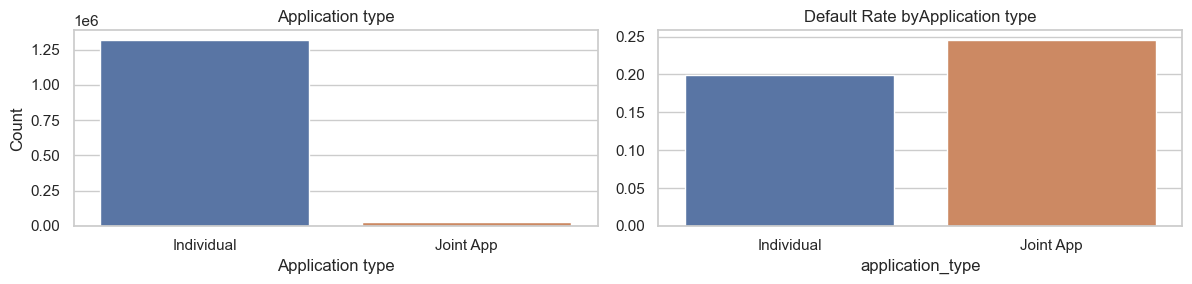

In [190]:
plot_var('application_type', 'Application type', continuous= False)

Joint loans tend to be charged off

### Data Preprocessing

* Remove unnecessary or reptitive features 
* Handle highly correlated features
* Remove or fill any missing data
* Convert categorical string features to dummy variable

**What data preprocessing we did so far?**

We also did some data preprocessing in EDA in order to get the better understanding of data:
1. convert 'emp_length' from categorical variable to numeric variable 
2. log transform 'annual_inc' and 'revol_bal'
3. only keep year information of 'earliest_cr_line' and convert it to numeric variable)
4. consolidate 'home_ownership' value: 'MORTGAGE', 'RENT', 'OWN' and 'OTHER'

**Remove unnecessary or reptitive features**

In [191]:
loans.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'log_annual_inc', 'log_revol_bal'],
      dtype='object')

In [194]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  object 
 2   int_rate              1345310 non-null  float64
 3   installment           1345310 non-null  float64
 4   grade                 1345310 non-null  object 
 5   sub_grade             1345310 non-null  object 
 6   emp_title             1259525 non-null  object 
 7   emp_length            1266799 non-null  float64
 8   home_ownership        1345310 non-null  object 
 9   verification_status   1345310 non-null  object 
 10  issue_d               1345310 non-null  object 
 11  loan_status           1345310 non-null  object 
 12  purpose               1345310 non-null  object 
 13  title                 1328651 non-null  object 
 14  dti                   1344936 non-

In [199]:
# Convert 'term to integers
loans['term'] = loans['term'].apply(lambda x: int(x.split()[0]))

In [201]:
# 'grade' can be implied by 'subgrade' -> drop the 'grade' column
loans.drop('grade', axis = 1, inplace = True)

In [204]:
# too many different job titles for this feature to be useful -> drop 'emp_title' column
loans.drop('emp_title', axis = 1, inplace= True)

In [205]:
# Too many different loan titles for 'title' feature 
# and it looks like 'purpose' variable contain this information -> drop 'title' column
loans.drop('title', axis = 1, inplace = True)

In [208]:
# Becasue we create a new column 'log_revol_bal', drop the old one
loans.drop('revol_bal', axis = 1, inplace= True)

In [212]:
# The variable 'issue_d' includes the month and year that the loan was funded
#  This would be data leakage, we wouldn't know beforehand whether or nor a loan would be issued when using model
# so drop this feature
loans.drop('issue_d', axis =1, inplace = True)

In [213]:
# The length of data
print(f'The length of the data: {loans.shape}')

The length of the data: (1345310, 22)


**Correlation**

<AxesSubplot:>

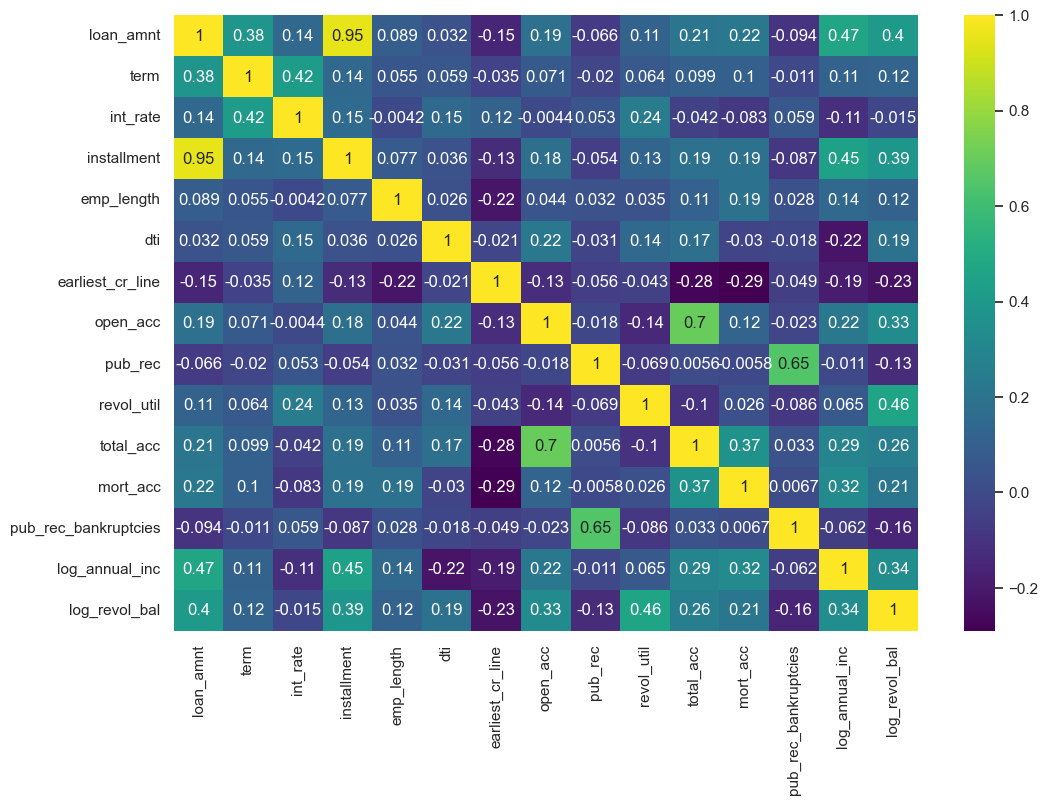

In [214]:
plt.figure(figsize = (12,8))
sns.heatmap(loans.corr(), annot = True, cmap = 'viridis')

From the above heatmap, we noticed that the correlation between 'loan_amt and 'installment' is very high (0.95). Are they duplicate information?

* installment: The monthly payment owed by the borrower if the loan originates.
* loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

Text(0.5, 1.0, 'Loan Amount by loan status')

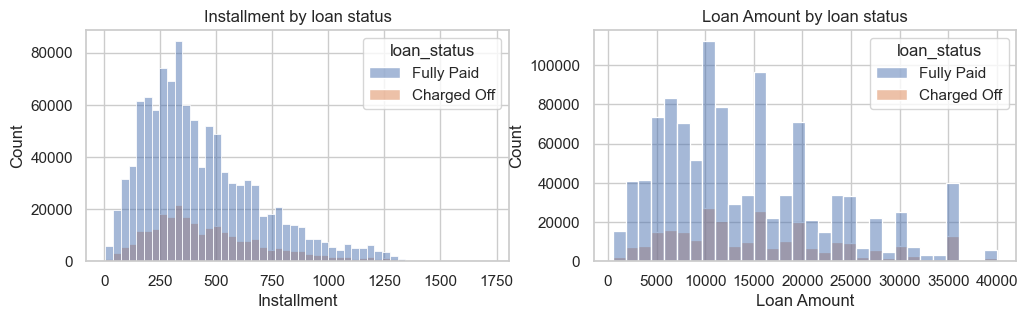

In [ ]:
f, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,3))
sns.histplot(data = loans, x = loans['installment'], hue = 'loan_status', bins = 50, ax= ax1)
ax1.set_xlabel('Installment')
ax1.set_ylabel('Count')
ax1.set_title('Installment by loan status')

sns.histplot(data = loans, x = loans['loan_amnt'], hue = 'loan_status', bins = 30, ax= ax2)
ax2.set_xlabel('Loan Amount')
ax2.set_ylabel('Count')
ax2.set_title('Loan Amount by loan status')



Text(0.5, 1.0, 'Loan status by loan amount')

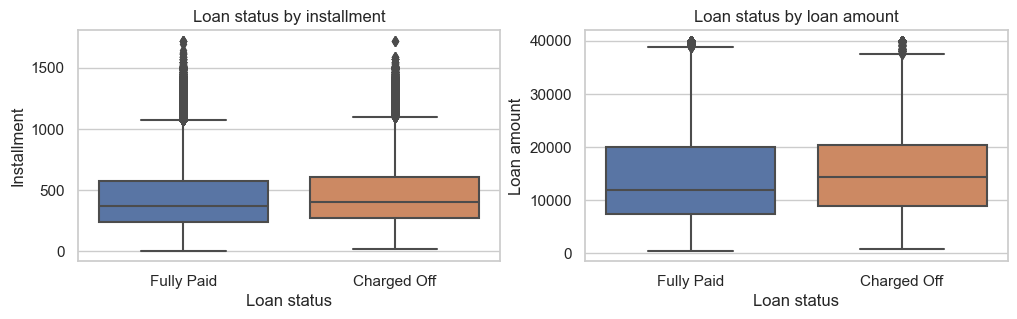

In [ ]:
f, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,3))
sns.boxplot(data = loans, y = 'installment', x = 'loan_status', ax= ax1)
ax1.set_ylabel('Installment')
ax1.set_xlabel('Loan status')
ax1.set_title('Loan status by installment')

sns.boxplot(data = loans, y = 'loan_amnt', x = 'loan_status', ax= ax2)
ax2.set_xlabel('Loan status')
ax2.set_ylabel('Loan amount')
ax2.set_title('Loan status by loan amount')

**Remove or fill any missing data**

In [222]:
missing_frac = loans.isnull().mean().sort_values(ascending=False)
for col in missing_frac.index:
    if missing_frac[col] >0:
        print(f"'{col}' missing fraction: {missing_frac[col]*100:.2f}%")

'emp_length' missing fraction: 5.84%
'mort_acc' missing fraction: 3.51%
'revol_util' missing fraction: 0.06%
'pub_rec_bankruptcies' missing fraction: 0.05%
'dti' missing fraction: 0.03%


In [233]:
# impute missing values of emp_length by its mean
# Becasue the distribution of emp_length is skewed, most people have emp_length =10
# We replaced its missing value with mode
loans['emp_length'] = loans['emp_length'].fillna(loans['emp_length'].mode()[0])


In [234]:
# fill in mort_acc missing values based on the mean of other columns
loans.corr()['mort_acc'].drop('mort_acc').sort_values(ascending=False)

total_acc               0.367947
log_annual_inc          0.322337
loan_amnt               0.224566
log_revol_bal           0.213520
installment             0.191559
emp_length              0.185066
open_acc                0.121218
term                    0.101394
revol_util              0.026424
pub_rec_bankruptcies    0.006717
pub_rec                -0.005783
dti                    -0.029558
int_rate               -0.083276
earliest_cr_line       -0.290714
Name: mort_acc, dtype: float64

In [246]:
# total_acc correlated with 'mort_acc' most. 
# We will group the dataframe by the total_acc and calculate the mean value for the mort_acc
total_acc_avg = loans.groupby('total_acc').mean().mort_acc

def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

loans['mort_acc'] = loans.apply(lambda x : fill_mort_acc(x['total_acc'], x['mort_acc']), axis =1)

In [250]:
# the amount of missing values of 'revol_util' ,'pub_rec_bankruptcies' and 'dti' are negligible
# so we will drop the rest of missing values
loans.dropna(inplace= True)
loans.shape

(1343383, 22)

In [329]:
# drop the infinity values of 'log_revol_bal' 
loans.replace([np.inf, -np.inf], np.nan, inplace=True)
loans.dropna(inplace=True)

**Convert categorical string features to dummy variable**

* convert target variable (loan_status) to 0/1 charge off indicator (0 indicates fully paid and 1 indicates charge off)

In [257]:
loans['loan_status'] = loans['loan_status'].apply(lambda x : int(x == 'Charged Off'))

* Create dummy variables for the categorical variables

In [266]:
var_object = [col for col in loans.columns if loans[col].dtype == object]
for var in var_object:
    print(f'The number of unique variable of {var}: {loans[var].nunique()}')

The number of unique variable of sub_grade: 35
The number of unique variable of home_ownership: 4
The number of unique variable of verification_status: 3
The number of unique variable of purpose: 14
The number of unique variable of initial_list_status: 2
The number of unique variable of application_type: 2


In [268]:
loans = pd.get_dummies(loans, columns=['sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type'], drop_first=True)

In [330]:
loans.shape

(1337544, 70)

In [331]:
loans.head(5)

,loan_amnt,term,int_rate,installment,emp_length,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,log_revol_bal,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
0,3600.0,36,13.99,123.03,10.0,0,5.91,2003,7.0,0.0,29.7,13.0,1.0,0.0,4.740371,3.441695,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,24700.0,36,11.99,820.28,10.0,0,16.06,1999,22.0,0.0,19.2,38.0,4.0,0.0,4.812920,4.331832,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,20000.0,60,10.78,432.66,10.0,0,10.78,2000,6.0,0.0,56.2,18.0,5.0,0.0,4.799347,3.895920,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,10400.0,60,22.45,289.91,3.0,0,25.37,1998,12.0,0.0,64.5,35.0,6.0,0.0,5.018842,4.341019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,11950.0,36,13.44,405.18,4.0,0,10.20,1987,5.0,0.0,68.4,6.0,0.0,0.0,4.531492,3.945567,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [272]:
# export clean data set for modeling 
loans.to_csv('loans_clean.csv', index=False)

**Train, test split**

In [284]:
from sklearn.model_selection import train_test_split

In [332]:
X = loans.drop('loan_status', axis =1)
y = loans['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [333]:
print(X_train.shape)

(1070035, 69)


**Remove outliers from the training set**

In [334]:
X_train = X_train[(X_train['dti'] <=50)  & (X_train['open_acc'] <= 40) 
& (X_train['total_acc'] <= 80) & (X_train['revol_util'] <= 120)]

In [335]:
print(X_train.shape)

(1065967, 69)


**Normalizing data**

In [336]:
from sklearn.preprocessing import MinMaxScaler

In [337]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)